In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("assets/spotify_songs.csv")
data["duration_m"] = (data["duration_ms"] / 100000).round()
data["duration_m%"] = (data["duration_ms"] / 100000)
data["year"] = data["track_album_release_date"].str.split("-", expand=True)[0]
data["month"] = data["track_album_release_date"].str.split("-", expand=True)[1]
data["day"] = data["track_album_release_date"].str.split("-", expand=True)[2]

data["month"] = data["month"].fillna("-1")
data["day"] = data["day"].fillna("-1")

data["year"] = data["year"].astype(int)
data["month"] = data["month"].astype(int)
data["day"] = data["day"].astype(int)

data["year_round"] = ((data["year"].astype(int) / 10).astype(int) * 10)

data["round_tempo"] = data["tempo"].round()

data.sample(100)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,valence,tempo,duration_ms,duration_m,duration_m%,year,month,day,year_round,round_tempo
6681,0FIcehhFxx18pBlc1wodFB,Schmeckt (feat. LX),Hemso,68,3E75F1bXGphNFpHtkClhGk,Schmeckt (feat. LX),2019-12-27,Modus Mio,37i9dQZF1DX36edUJpD76c,rap,...,0.101,93.373,178027,2.0,1.78027,2019,12,27,2010,93.0
27721,20hsdn8oITBsuWNLhzr5eh,Byte,Martin Garrix,60,7bhogovOiLN8d5QEKltWyc,Byte,2017-04-07,Jeff Seid Electro House,2Tisn6NZbeofpc57Oc6MGo,edm,...,0.267,128.031,285089,3.0,2.85089,2017,4,7,2010,128.0
7919,7bre6yd84LZ6MFoTppmHja,Swimming Pools (Drank),Kendrick Lamar,7,0ljGAdQ5EmiJE52O1VsYAM,Swimming Pools (Drank),2012-08-03,Hip-Hop 'n RnB,0275i1VNfBnsNbPl0QIBpG,rap,...,0.203,74.543,247800,2.0,2.47800,2012,8,3,2010,75.0
2745,7HW01sQy5UOxyezzZg98nd,The Days,Avicii,6,6bV4Ee8NU7YubrdPec3ab5,The Days / Nights,2014-12-01,ELECTROPOP,2UsEj2GUukV0GLbsE3rldz,pop,...,0.557,127.009,278480,3.0,2.78480,2014,12,1,2010,127.0
32342,2pBXrE9QrM1p6gsTHYAJ0l,Lift Off! - Radio Edit,W&W,36,5n0vWhohYS0joWAXDuKwGV,Lift Off!,2012-12-17,Gym (Melbourne Bounce/Progressive House),5BqOZpVEqRDfZScvW1QUyA,edm,...,0.449,128.025,183750,2.0,1.83750,2012,12,17,2010,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,6vN77lE9LK6HP2DewaN6HZ,Yes Indeed,Lil Baby,81,7yf9ZJyHRbp8sHtpDKfPpt,Harder Than Ever,2018-05-18,GANGSTA RAP,3DUkl93JjPdOyX83SJr5ms,rap,...,0.562,119.958,142273,1.0,1.42273,2018,5,18,2010,120.0
24627,6c7b38jca5pwnY6Tf8W7n5,Missing You,Case,0,2QPJkjDw4pTOgFO9K4xd4B,Best Of,2014-05-27,Ultimate Throwbacks Collection,1dsaMvnC1hXPCNGC4aVtjj,r&b,...,0.756,172.544,284760,3.0,2.84760,2014,5,27,2010,173.0
2456,1CmpcrpU2E5SzjxntU8KM7,Make Up Your Mind,KEV,0,0gQnYdtzFFZ4YHJLtjjCRu,Make Up Your Mind,2018-01-26,Electro Pop | Electropop,2a5i2ZtEXGKwVGL16J8N0p,pop,...,0.220,105.016,233813,2.0,2.33813,2018,1,26,2010,105.0
16227,4ctpogwllZ06lgqpFORcZR,Rivers - Sam Feldt & De Hofnar Remix,Thomas Jack,48,1TlstMo9DcjU35G5BEFKLr,Rivers (Remixes),2015-10-29,Tropical House,37i9dQZF1DX0AMssoUKCz7,latin,...,0.405,125.000,251548,3.0,2.51548,2015,10,29,2010,125.0


C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

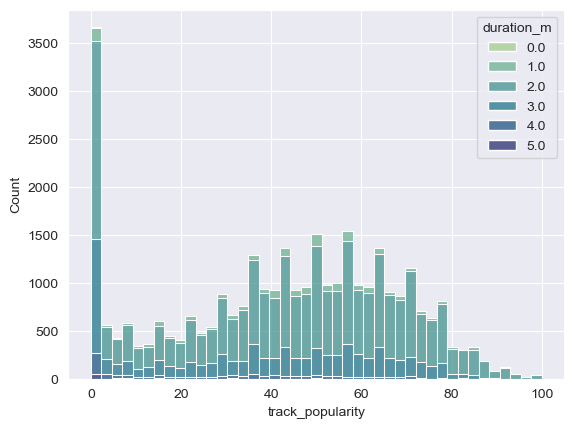

In [3]:
sns.histplot(data=data, x="track_popularity", hue="duration_m", multiple="stack",
             palette="crest")

<Axes: xlabel='track_popularity', ylabel='Count'>

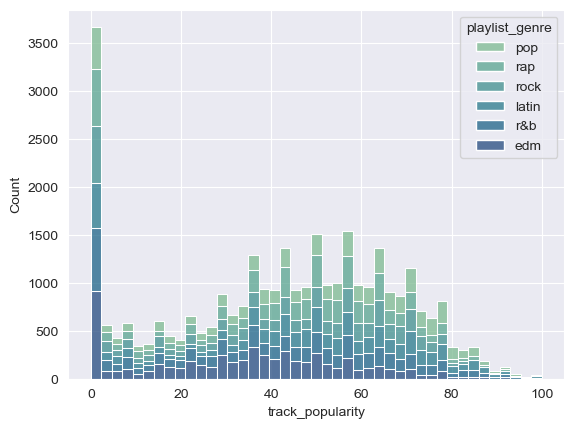

In [12]:
sns.histplot(data=data, x="track_popularity", hue="playlist_genre", multiple="stack",
             palette="crest")

<Axes: xlabel='month', ylabel='Count'>

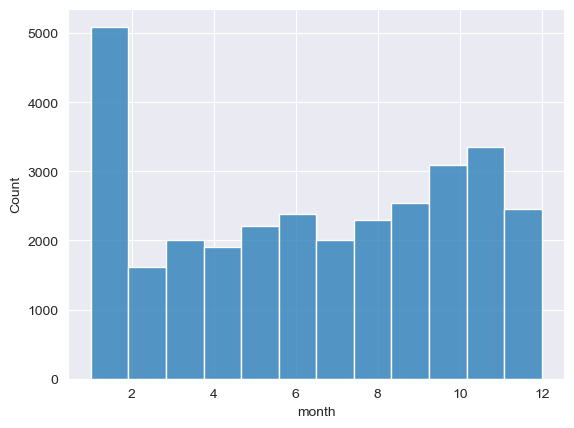

In [84]:
sns.histplot(data=data[data["month"] >= 0], x="month", bins=12)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

<Axes: xlabel='playlist_genre', ylabel='Count'>

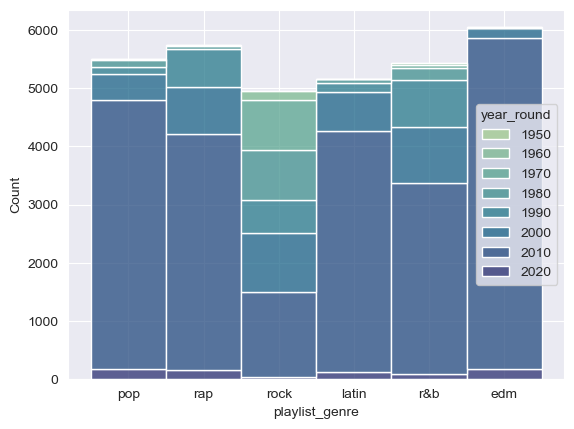

In [20]:
sns.histplot(data=data, x="playlist_genre", hue="year_round", multiple="stack", palette="crest")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

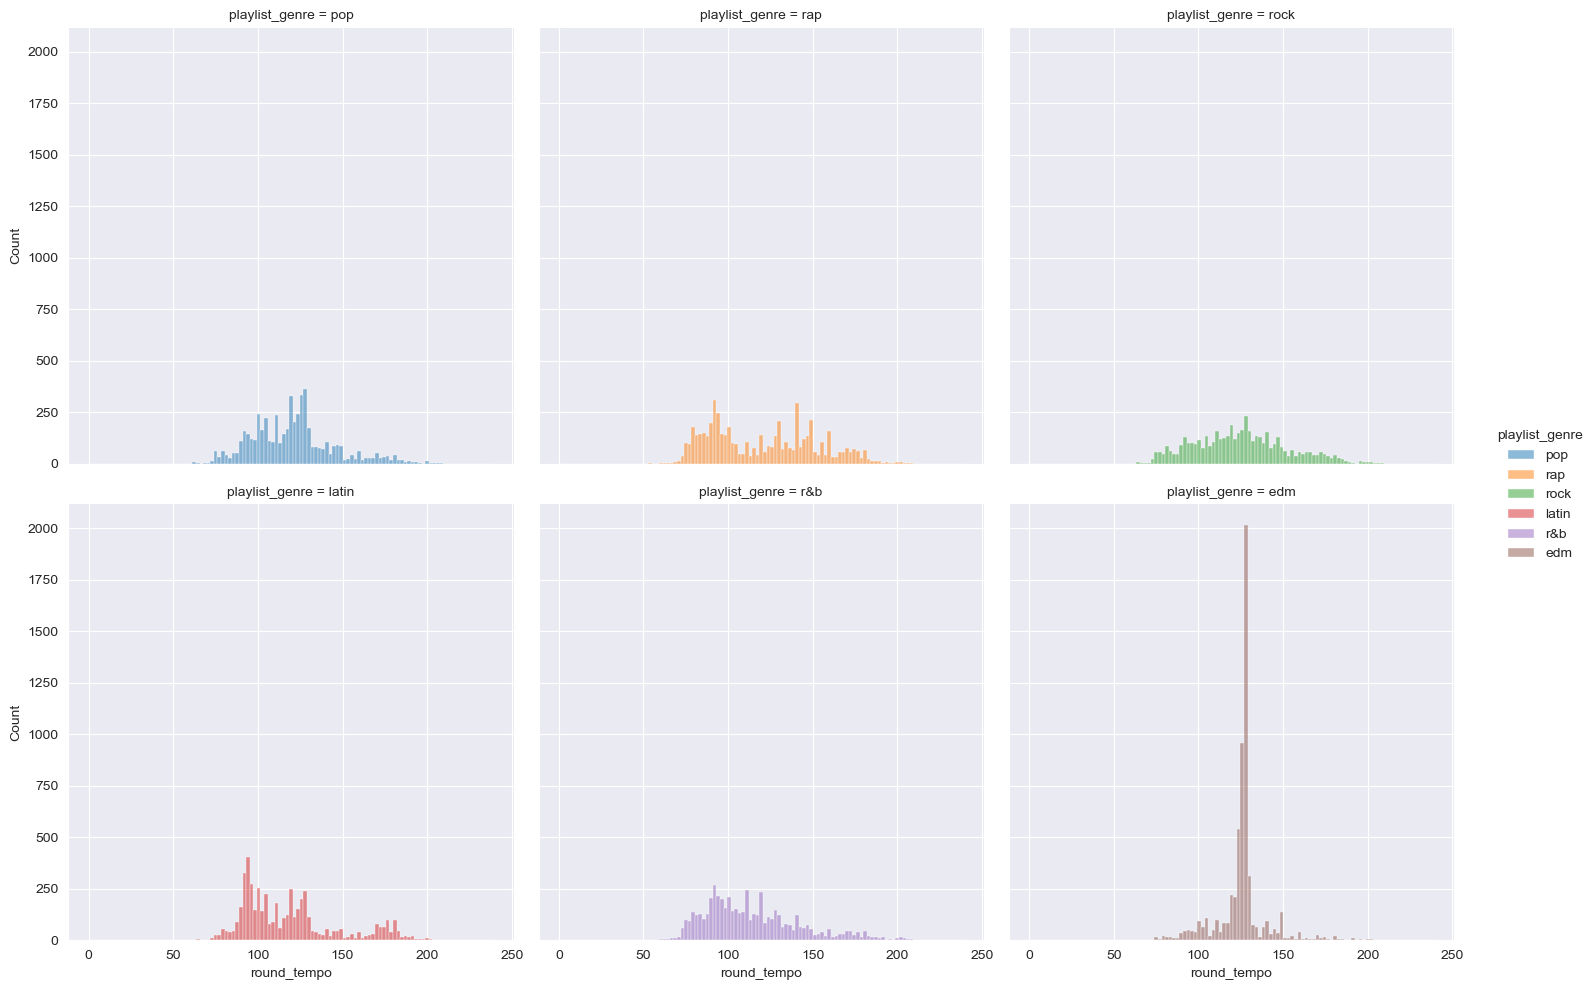

In [4]:
sns.displot(data=data[data["playlist_genre"] != "edm"], x="round_tempo", col="playlist_genre", hue="playlist_genre",
            col_wrap=3)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

<Axes: xlabel='playlist_genre', ylabel='Count'>

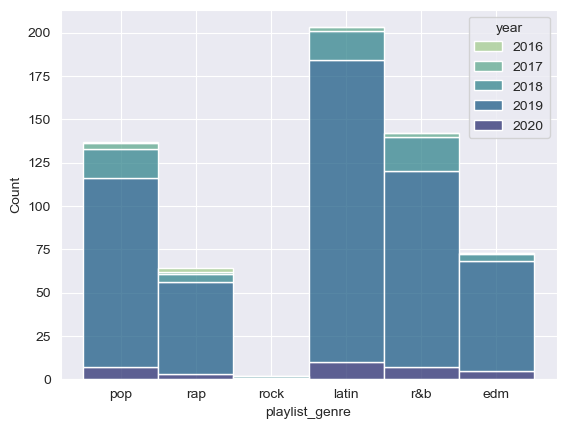

In [5]:
sns.histplot(data=data[(data["track_popularity"] > 85) & (data["year"] > 2000)], x="playlist_genre", hue="year",
             palette="crest", multiple="stack")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration_m%', ylabel='Count'>

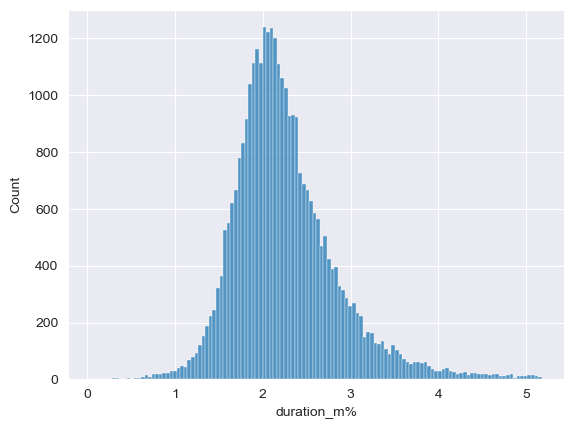

In [15]:
sns.histplot(data=data, x="duration_m%")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='playlist_subgenre', ylabel='Count'>

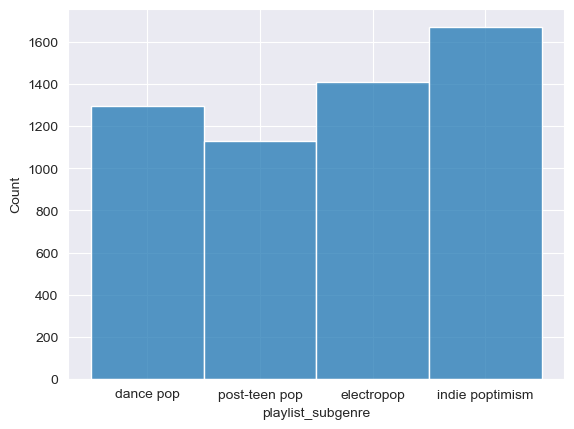

In [16]:
sns.histplot(data=data[data["playlist_genre"] == "pop"], x="playlist_subgenre")

<Axes: xlabel='playlist_subgenre', ylabel='Count'>

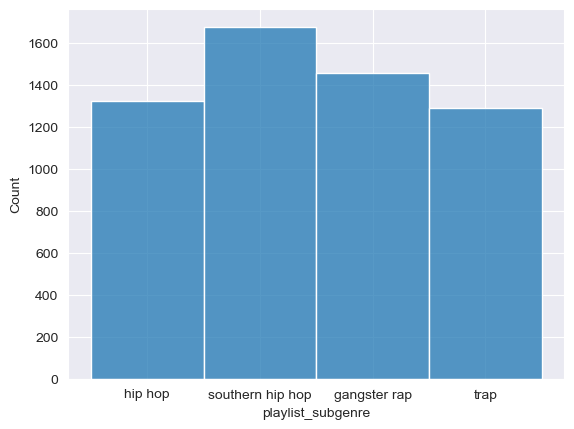

In [65]:
sns.histplot(data=data[data["playlist_genre"] == "rap"], x="playlist_subgenre")

<Axes: xlabel='playlist_subgenre', ylabel='Count'>

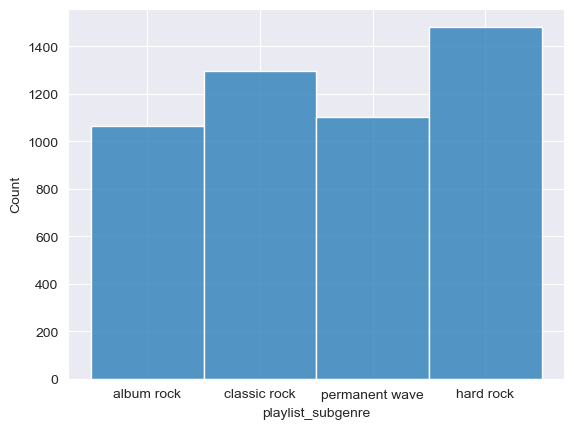

In [103]:
sns.histplot(data=data[data["playlist_genre"] == "rock"], x="playlist_subgenre")

<Axes: xlabel='year', ylabel='Count'>

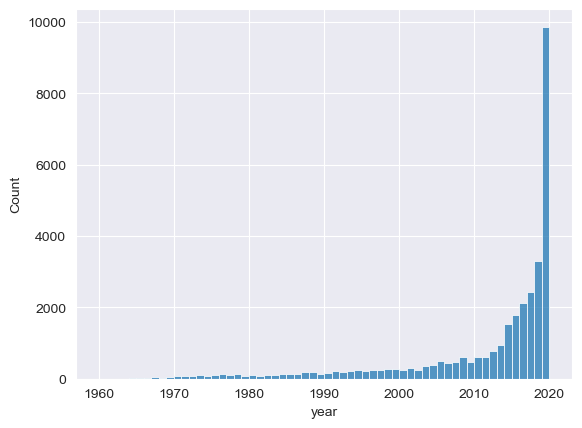

In [115]:
sns.histplot(data=data, x="year", binrange=(1960, 2020), bins=2020 - 1960)

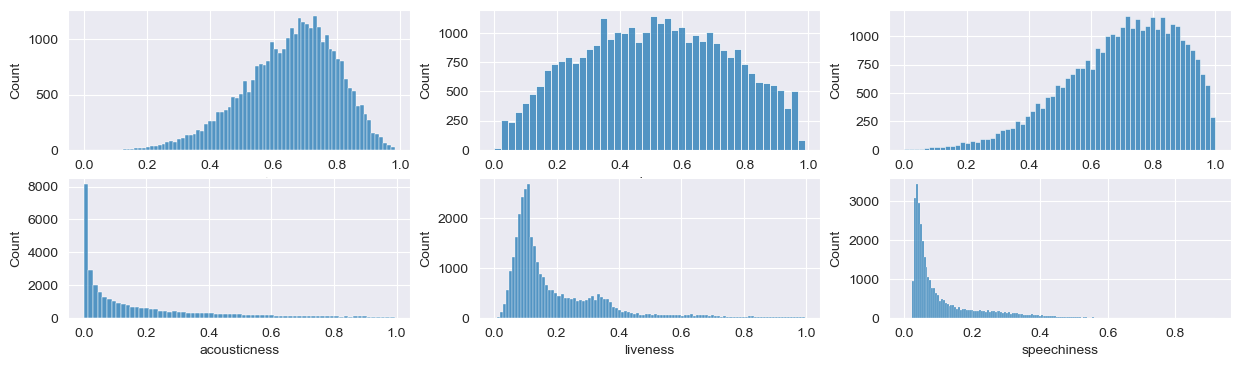

In [8]:
variables = ["danceability", "valence", "energy", "acousticness", "liveness", "speechiness"]

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 4))

axes = axes.flatten()

for i, variable in enumerate(variables):
    sns.histplot(data=data, x=variable, ax=axes[i])


C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

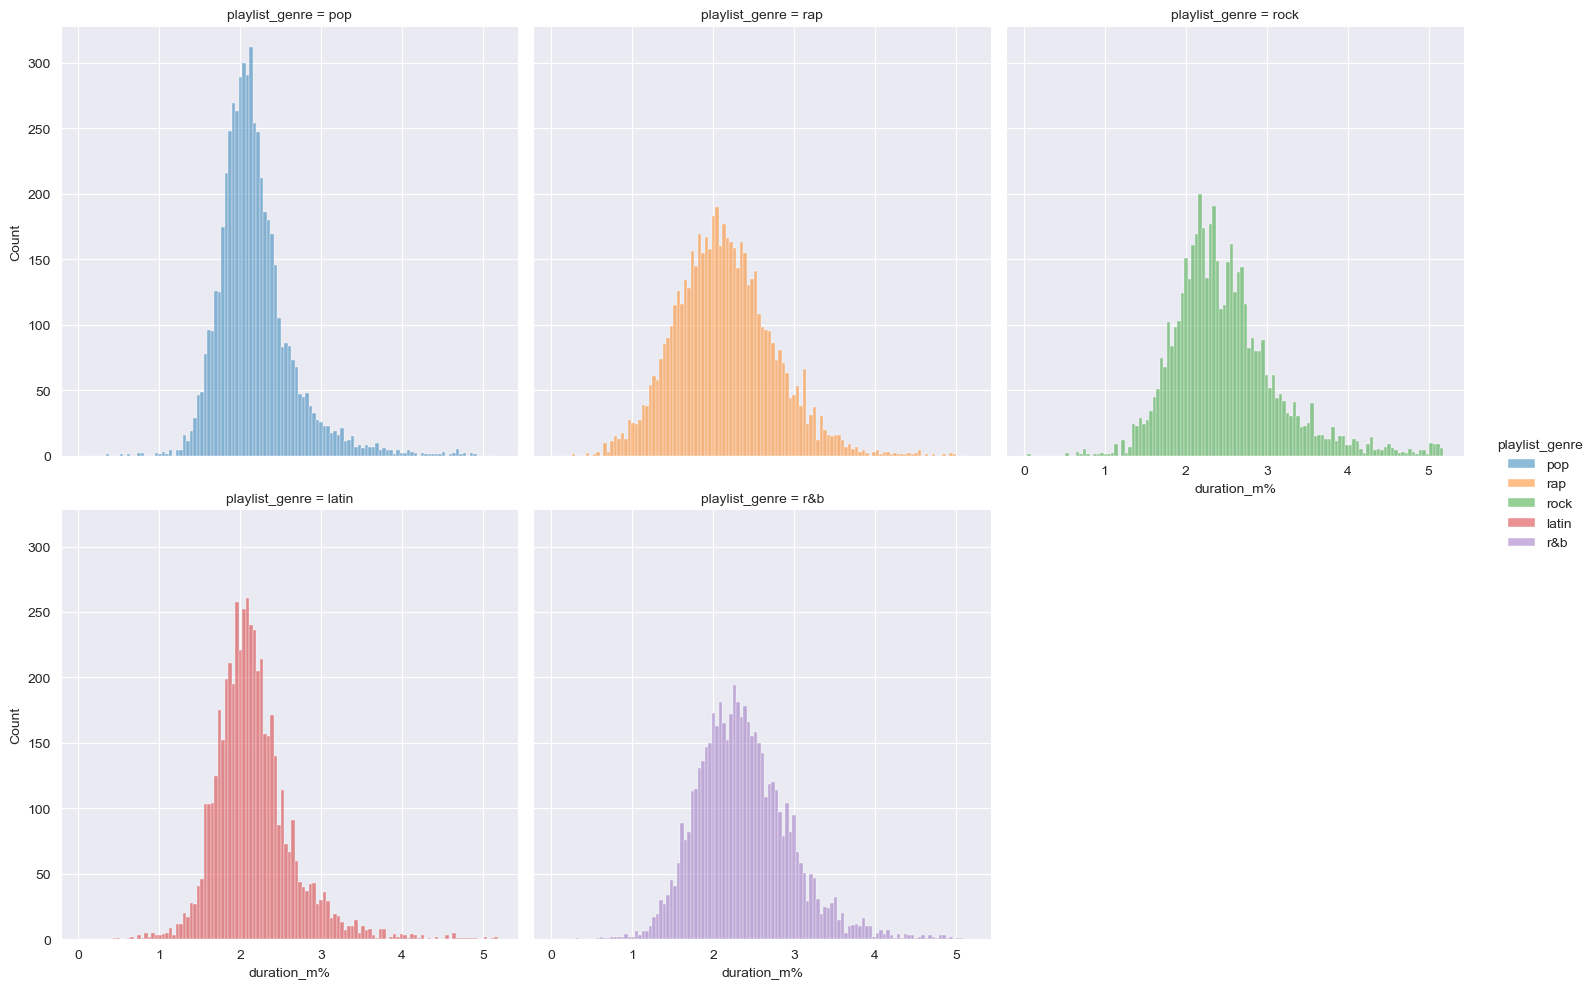

In [14]:
sns.displot(data=data[data["playlist_genre"] != "edm"], x="duration_m%", col="playlist_genre", hue="playlist_genre",
            col_wrap=3)